In [2]:
import pandas as pd
import numpy as np
import scipy.stats as sp
import matplotlib.pyplot as plt

# Problem 1

### Problem 1.1

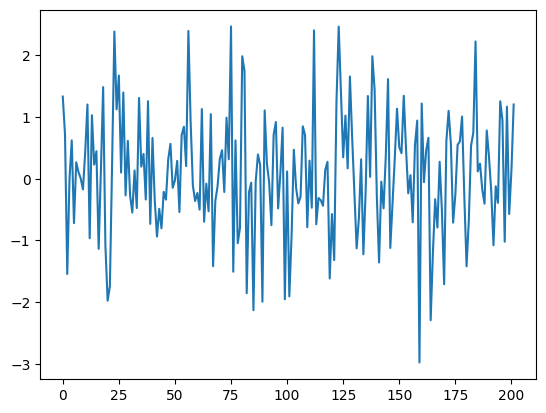

In [3]:
rs = np.random.RandomState(seed=10)
mean = 0
std = 1

noise = []

t = range(202)

for i in t:
    noise.append(sp.norm.rvs(loc=mean,scale=std,random_state=rs))

plt.plot(t,noise)
plt.show()

## Problem 1.2

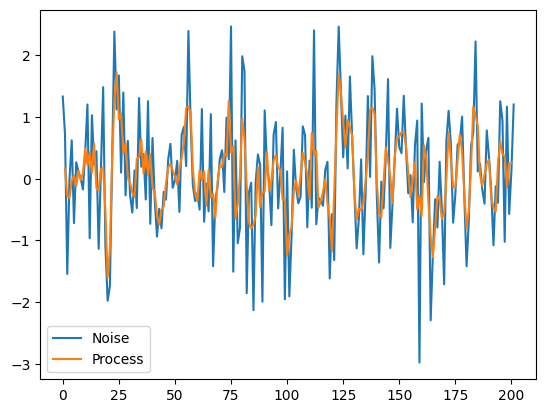

In [4]:
X_t = []
for i in range(1,201):
    X_t.append(1/3*(noise[i-1] + noise[i] + noise[i+1]))

plt.plot(t,noise,label='Noise')
plt.plot(t[1:-1],X_t,label='Process')
plt.legend()
plt.show()

The process seems to have slightly less volatility.

## Problem 1.3

See PDF

## Problem 1.4

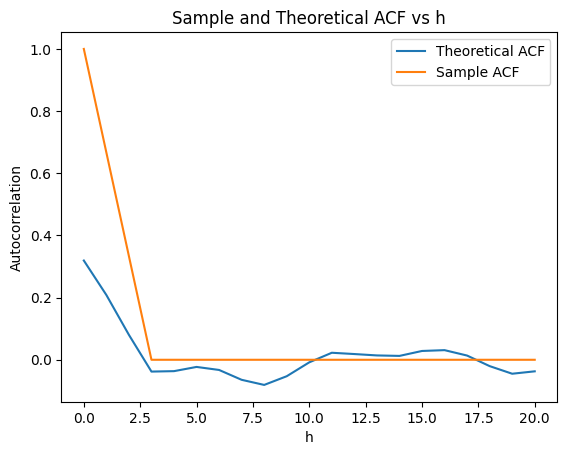

In [13]:
sample_mean = np.mean(X_t)
n = len(X_t)

def sample_acf_fxn(h):
    acf = 0
    for t in range(n-abs(h)):
        acf += (X_t[t+abs(h)]-sample_mean) * (X_t[t]-sample_mean)
    acf = acf/n
    return acf

sample_acf = []
for h in range(21):
    sample_acf.append(sample_acf_fxn(h))

theoretical_acf = [1,2/3,1/3] + [0] * (21-3)

plt.plot(range(21),sample_acf,label='Theoretical ACF')
plt.plot(range(21),theoretical_acf, label='Sample ACF')
plt.title('Sample and Theoretical ACF vs h')
plt.xlabel('h')
plt.ylabel('Autocorrelation')
plt.legend()
plt.show()

The relationship is complicated but they imply a similar result: a larger h is shown/thought to have a lower ACF.